# Inspect at a `cells.feather` file (one sample)

- `Creation` = 2022_10_07
- `Last modification` = 2022_10_07

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the file

In [2]:
FPATH = "/home/etienne.doumazane/data/Alba/200316-81/cells.feather"
df = pd.read_feather(FPATH)
df

,x,y,z,size,source,xt,yt,zt,order,id,hemisphere,name,color,volume
0,3215,3190,63,152,9840723.0,252.417411,311.154415,7.025416,332,442,255,"Retrosplenial area, dorsal part, layer 1","[0.10196078431372549, 0.6509803921568628, 0.59...",815281250
1,2758,3015,67,56,15002249.0,216.549555,297.354154,11.607513,0,0,0,universe,"[0.0, 0.0, 0.0]",704492906250
2,2058,2815,70,118,18837674.0,160.973055,282.263718,18.186485,385,312782560,0,No label,"[0.4392156862745098, 1.0, 0.44313725490196076]",1439937500
3,2499,3146,71,85,20225798.0,196.350462,308.234519,12.046745,333,434,0,"Retrosplenial area, dorsal part, layer 2/3","[0.10196078431372549, 0.6509803921568628, 0.59...",974046875
4,2404,2583,78,187,6006774.0,188.846829,263.822546,19.862904,306,965,0,"Retrosplenial area, lateral agranular part, la...","[0.10196078431372549, 0.6509803921568628, 0.59...",671468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,2989,2906,1928,720,19111106.0,241.001125,301.246624,300.103735,0,0,255,universe,"[0.0, 0.0, 0.0]",704492906250
45460,3344,4589,1940,57,8798607.0,267.654416,422.508356,287.271656,927,354,255,Medulla,"[1.0, 0.6078431372549019, 0.803921568627451]",8992203125
45461,2135,5636,1979,65,16131788.0,165.716385,507.782585,300.758661,0,0,0,universe,"[0.0, 0.0, 0.0]",704492906250
45462,3503,5334,1989,52,38127624.0,281.117839,481.403220,293.956547,927,354,255,Medulla,"[1.0, 0.6078431372549019, 0.803921568627451]",8992203125


## Hemispheres

In [3]:
'hemisphere' in df.columns

True

In [4]:
df.hemisphere.unique()

array([255,   0])

##  Number of cells in sample

In [5]:
df.shape[0]

45464

## Distribution of cells across the large regions of the brain

In [6]:
df.groupby('name')['id'].count().sort_values(ascending=False)

name
Primary somatosensory area, barrel field, layer 2/3    9546
No label                                               4028
Primary somatosensory area, barrel field, layer 6a     3404
Primary somatosensory area, barrel field, layer 4      2493
Secondary motor area, layer 5                          2029
                                                       ... 
Interpeduncular nucleus                                   1
Interfascicular nucleus raphe                             1
Infralimbic area, layer 1                                 1
Gustatory areas, layer 5                                  1
Main olfactory bulb                                       1
Name: id, Length: 307, dtype: int64

In [7]:
counts = (df.groupby('name')['id'].count()
          .sort_values(ascending=False)
          .to_frame().reset_index()
          .rename(columns={"id":"count"}).head(20))

<AxesSubplot:xlabel='count', ylabel='name'>

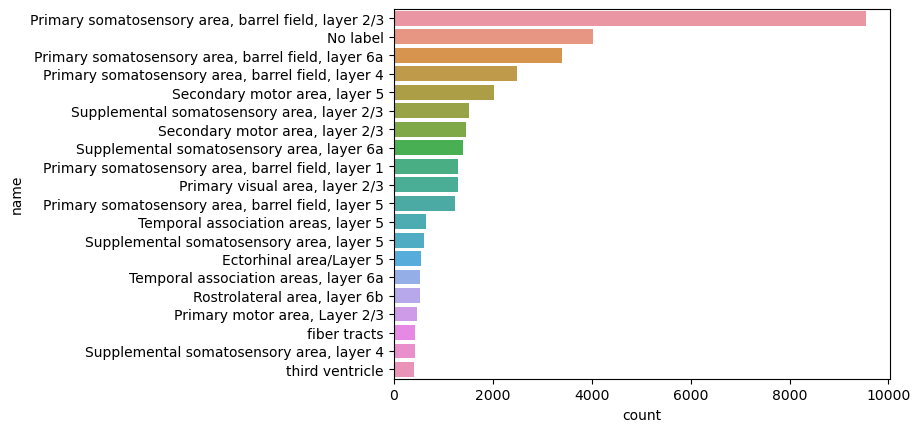

In [8]:
sns.barplot(data=counts, x='count', y="name")